# 1 - Lendo imagens

## 1.1 - Usando o scikit-image

In [1]:
from skimage import io

In [2]:
img = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif")
print(img.shape)  #y,x,c

#x = Width = 1376
#y = Height = 1104
#Channels = 3 (RGB)

(1104, 1376, 3)


In [3]:
#Some image processing tasks in skimage require floating point image
#with values between 0 and 1

from skimage import img_as_float
img2 = img_as_float(img)

In [4]:
import numpy as np
img3 = img.astype(np.float64)
#avoid using astype as it violates assumptions about dtype range.
#for example float should range from 0 to 1 (or -1 to 1) but if you use 
#astype to convert to float, the values do not lie between 0 and 1. 

#Convert back to 8 bit
from skimage import img_as_ubyte
img_8bit = img_as_ubyte(img2)


## 1.2 - Usando o openCV

######### Using openCV #########<br>
"""<br>
#to install open CV : pip install opencv-python<br>
#to import the package you need to use import cv2<br>
#openCV is a library of programming functions mainly aimed at computer vision.<br>
#Very good for images and videos, especially real time videos.<br>
#It is used extensively for facial recognition, object recognition, motion tracking,<br>
#optical character recognition, segmentation, and even for artificial neural netwroks. <br>
<br>
You can import images in color, grey scale or unchanged usingindividual commands <br>
cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.<br>
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode<br>
cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel<br>
Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.<br>
<br>
"""

In [5]:
import cv2

grey_img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 0)
color_img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 1)

In [6]:
#images opened using cv2 are numpy arrays
print(type(grey_img))
print(type(color_img))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#Big difference between skimage imread and opencv is that 
#opencv reads images as BGR instead of RGB.

img_opencv = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) #Should be same as skimage image

# 2 - Aplicando filtro Gaussiano e salvando a imagem

In [8]:
img = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif")

In [9]:
from skimage import filters
gaussian_img = filters.gaussian(img, sigma=1)

#Save image using skimage
#Best way as it converts float images to RGB and scales them accordingly
io.imsave("saved_using_skimage.tif", gaussian_img)

In [10]:
#save image using opencv
cv2.imwrite("saved_using_opencv.jpg", gaussian_img)

True

In [11]:
#Will succeed writing an image but rounds off flaot
#final image may not look good if saving float 
#so first convert float to 8 bit
from skimage import img_as_ubyte
gaussian_img_8bit = img_as_ubyte(gaussian_img)
cv2.imwrite("saved_using_opencv2.jpg", gaussian_img_8bit)

True

In [12]:
#This saves fine and the image should be fine but ...
#The colors may be weird, if you are saving color images.
#This is because opencv uses BGR instead of RGB.
#If scolors are important then try working fully within opencv, 
#including reading and writing images.
#Or, convert images from BGR to RGB when necessary.

gaussian_img_8bit_RGB = cv2.cvtColor(gaussian_img_8bit, cv2.COLOR_BGR2RGB)
cv2.imwrite("saved_using_opencv3.jpg", gaussian_img_8bit_RGB)


True

In [13]:
#Save using Matplotlib
from matplotlib import pyplot as plt
plt.imsave("saved_using_pyplot.jpg", gaussian_img)
#For gray images you can define a colormap using cmap


In [14]:
#Saving images into tiff files..
#USe tifffile library: pip install tifffile
#First convert images to 8 bit and then use tifffile
import tifffile
tifffile.imwrite("saved_using_tifffile.tiff", gaussian_img_8bit)

#Can also use skimage but image needs to be converted to 8 bit integer first. 
io.imsave("saved_using_skimage.tif", gaussian_img_8bit)


# 3 - Visualizando imagens

## 3.1 - Usando o scikit-image

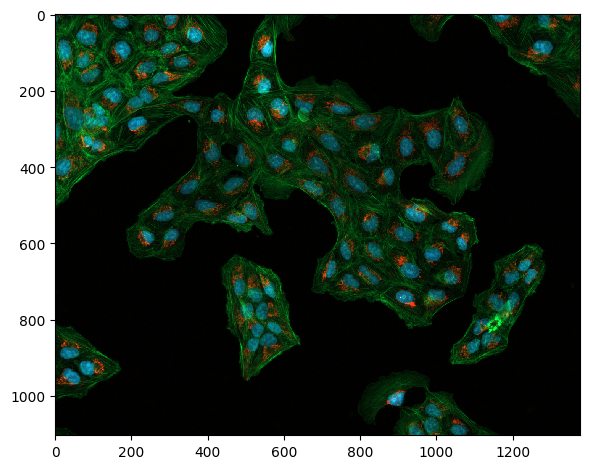

In [15]:
io.imshow(img)

## 3.2 - Usando o MatPlotlib

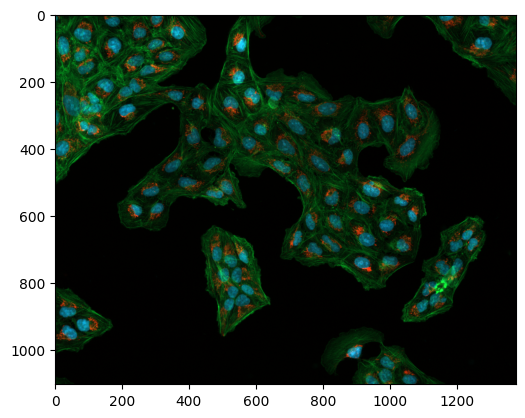

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)

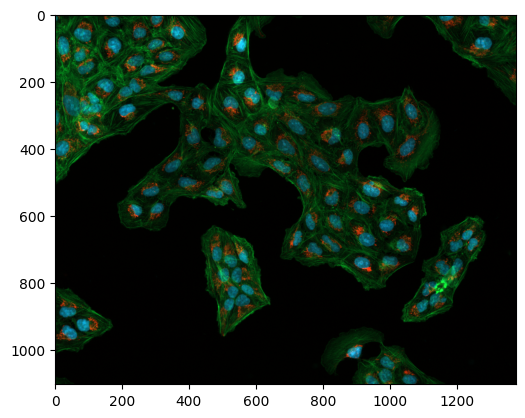

In [17]:
#Colormaps...  https://matplotlib.org/tutorials/colors/colormaps.html
plt.imshow(img, cmap="hot")
#Not going to do anything as the input image is RGB

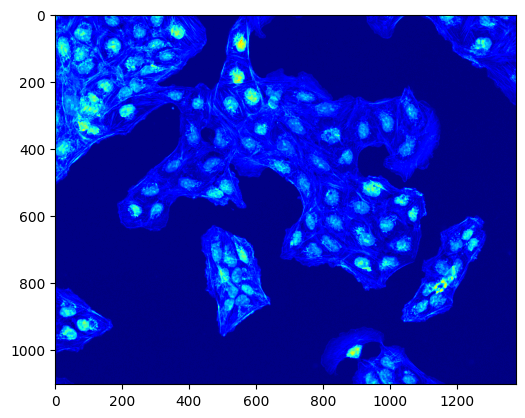

In [18]:
img_gray = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 0)

plt.imshow(img_gray, cmap="jet")

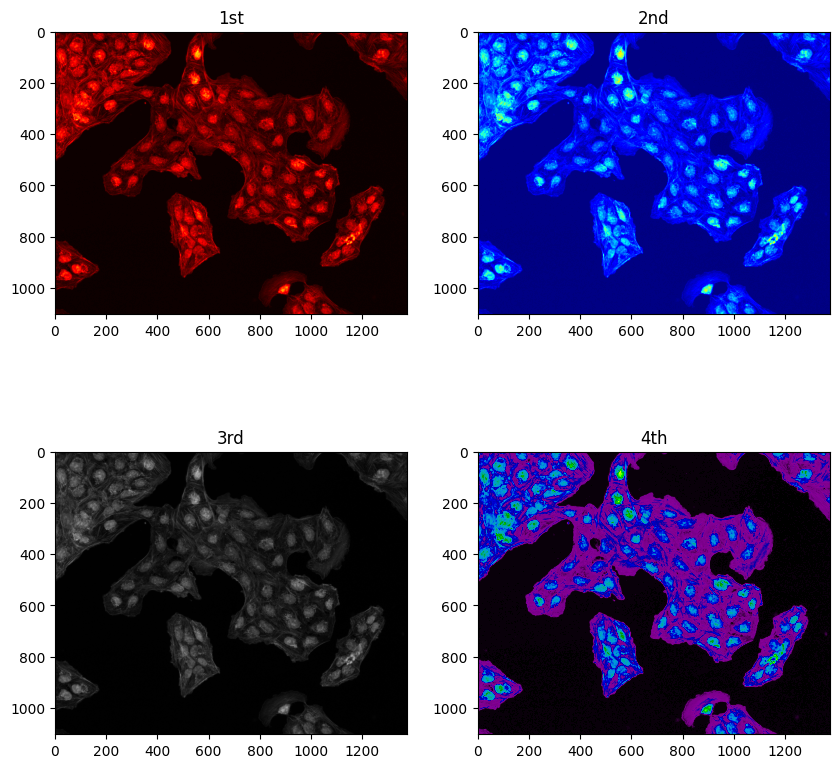

In [19]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_gray, cmap='hot')
ax1.title.set_text('1st')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_gray, cmap='jet')
ax2.title.set_text('2nd')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_gray, cmap='gray')
ax3.title.set_text('3rd')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_gray, cmap='nipy_spectral')
ax4.title.set_text('4th')
plt.show()

## 3.3 - Usando o openCV

In [20]:
#Using opencv

import cv2

gray_img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 0)
color_img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 1)

In [21]:
# Use the function cv2.imshow() to display an image in a window. 
# First argument is the window name which is a string. second argument is our image. 

cv2.imshow("pic from skimage import", img)  #Shows weird colors as R and B channels are swapped
cv2.waitKey(0)
cv2.imshow("color pic from opencv", color_img)
cv2.waitKey(0)
cv2.imshow("gray pic from opencv", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4 - Revisão de MatPlotlib

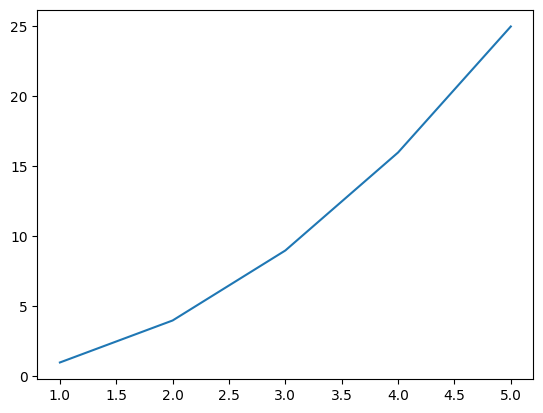

In [22]:
from matplotlib import pyplot as plt

x = [1,2,3,4,5]
y = [1,4,9,16,25]

plt.plot(x,y)  #plot takes any number of arguments

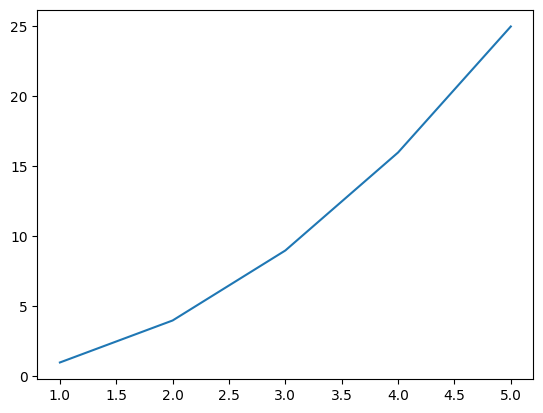

In [23]:
#Also understands numpy arrays
import numpy as np
a = np.array(x)
b = np.array(y)
plt.plot(a,b)

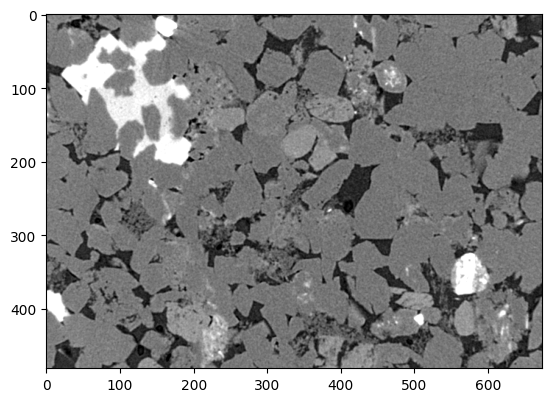

In [24]:
#Images can also be plotted (covered in viewing images tutorial)
#Images are numpy arrays
import cv2
gray_img = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/sandstone.tif', 0)

plt.imshow(gray_img, cmap="gray")

(array([  574.,   170.,   196.,   271.,   444.,   647.,   935.,  1313.,
         1771.,  2225.,  2809.,  3153.,  3487.,  3530.,  3384.,  3104.,
         2633.,  2230.,  2047.,  1941.,  1831.,  1819.,  1840.,  1859.,
         2011.,  2080.,  2086.,  2144.,  2249.,  2458.,  2679.,  2824.,
         3230.,  4055.,  5631.,  8774., 13299., 18807., 24229., 27314.,
        27985., 25585., 21147., 16077., 11871.,  8441.,  6311.,  4639.,
         3890.,  4167.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
         66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
         99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
        132., 135., 138., 141., 144., 147., 150.]),
 <BarContainer object of 50 artists>)

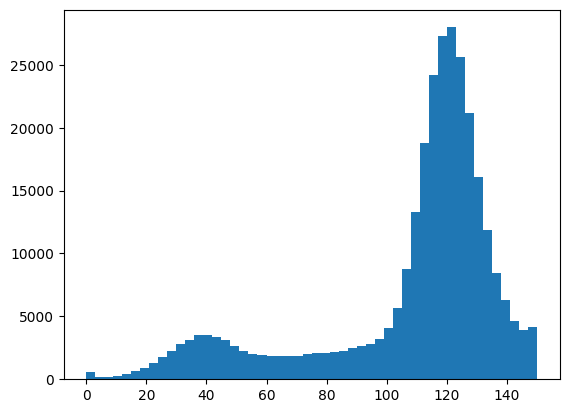

In [25]:
plt.hist(gray_img.flat, bins=50, range=(0,150))

(0.0, 6.0, 0.0, 50.0)

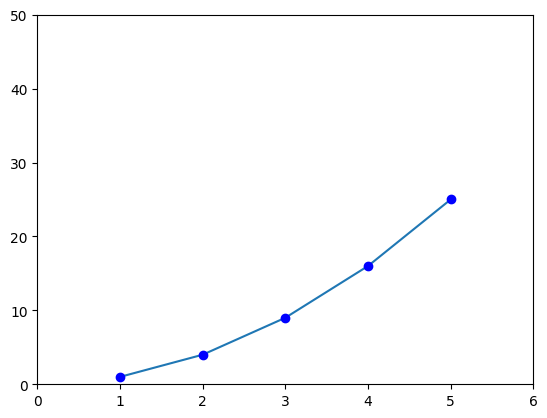

In [26]:
#Formatting
from matplotlib import pyplot as plt

import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([1,4,9,16,25])
plt.plot(a,b)
plt.plot(a, b, 'bo')  #Blue dots. Also try: 'r--' 'g^' 'bs'
plt.axis([0, 6, 0, 50]) #Define range for x and y axes [xmin, xmax, ymin, ymax] 

<BarContainer object of 5 artists>

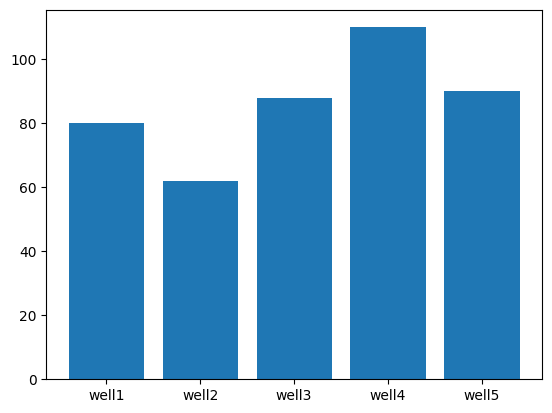

In [27]:
#Various types of plots
from matplotlib import pyplot as plt

wells = ['well1', 'well2', 'well3', 'well4', 'well5']
cells = [80, 62, 88, 110, 90]

plt.bar(wells, cells)

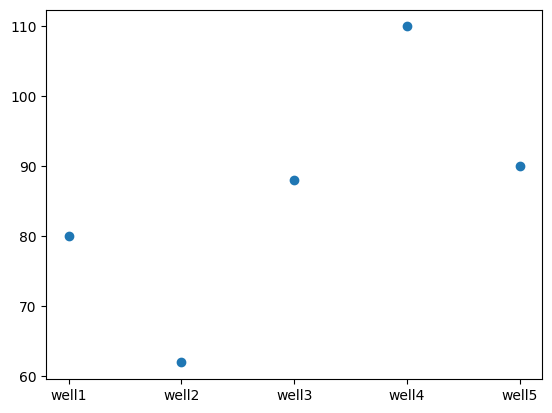

In [28]:
plt.scatter(wells, cells)

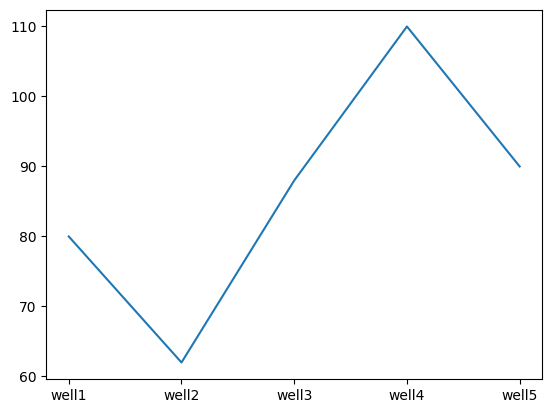

In [29]:
plt.plot(wells, cells)

[None, None]

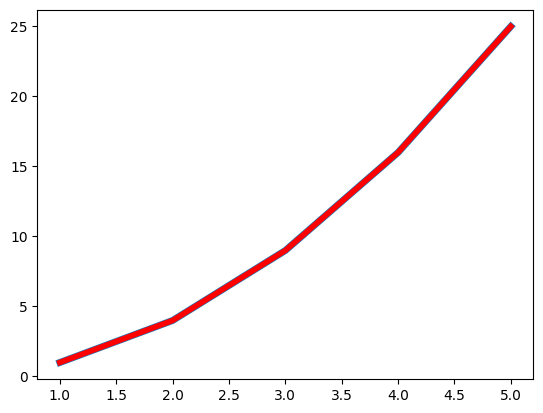

In [30]:
a = np.array([1,2,3,4,5])
b = np.array([1,4,9,16,25])
plt.plot(a, b, linewidth=5.0)
#use setp() to define multiple parameters
fig = plt.plot(a, b, linewidth=5.0)
plt.setp(fig, color='r', linewidth=4.0)
#look at the documentation for more infor on setp()
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.setp.html#matplotlib.pyplot.setp

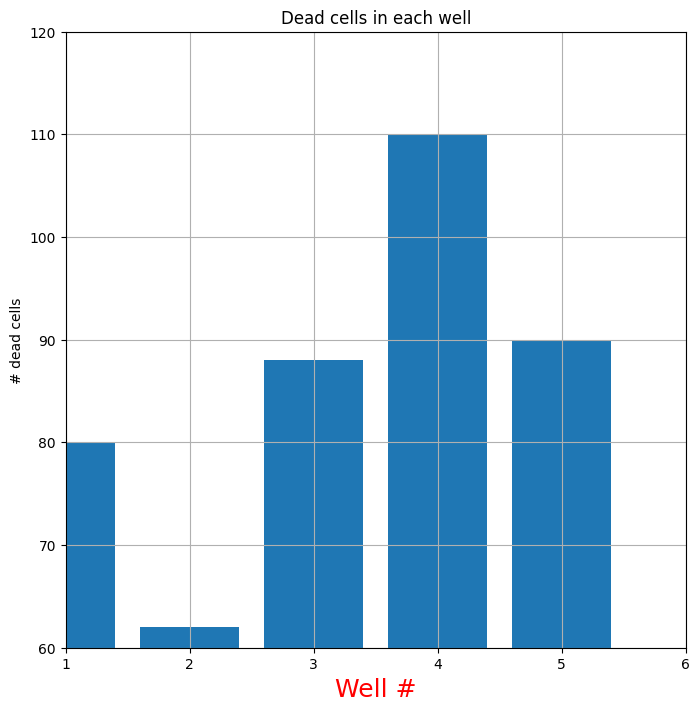

In [31]:
#Adding labels and annotations
wells = [1,2,3,4,5]
cells = [80, 62, 88, 110, 90]

plt.figure(figsize=(8, 8))
plt.bar(wells, cells)
plt.xlabel('Well #', fontsize=18, color='red')
plt.ylabel('# dead cells')
plt.title('Dead cells in each well')
plt.axis([1, 6, 60, 120])   #xmin, xmax, ymin, ymax
plt.grid(True)
plt.show()

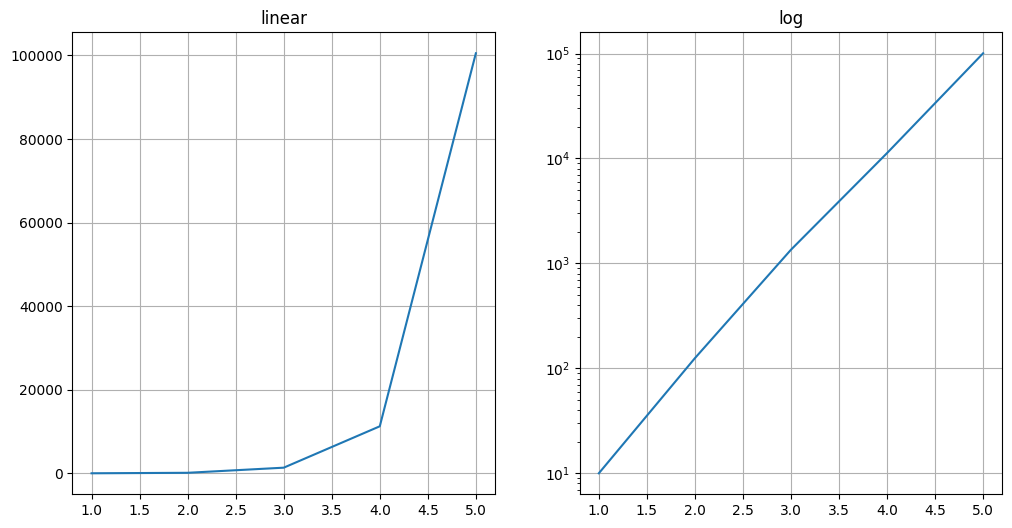

In [32]:
from matplotlib import pyplot as plt

x = [1,2,3,4,5]
y = [10, 125, 1350, 11250, 100500]

plt.figure(figsize=(12, 6))

# linear
plt.subplot(121)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

#Log
plt.subplot(122)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


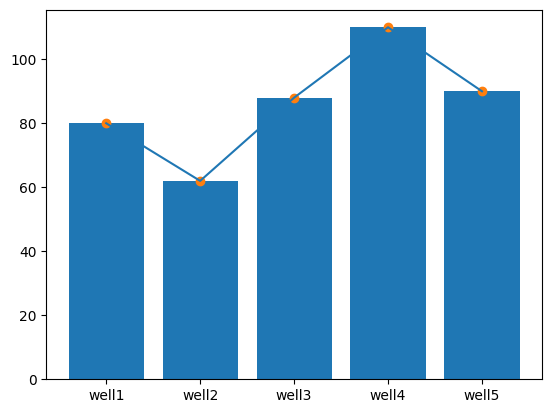

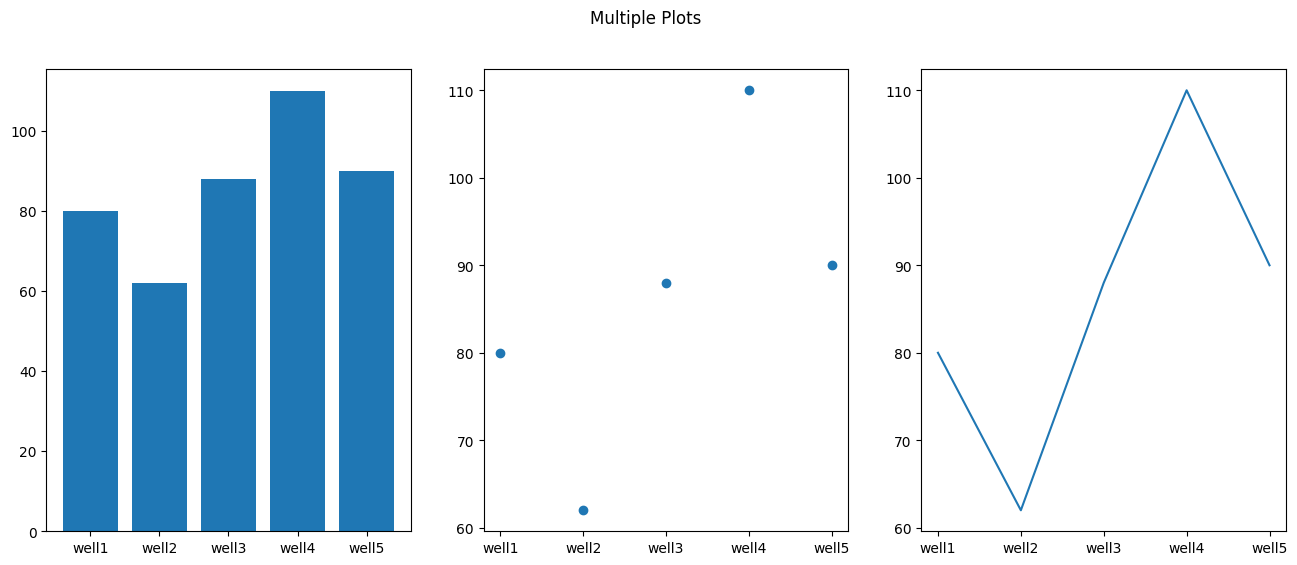

In [33]:
#Use subplots to arrange multiple plots

from matplotlib import pyplot as plt

wells = ['well1', 'well2', 'well3', 'well4', 'well5']
cells = [80, 62, 88, 110, 90]

plt.bar(wells, cells)
plt.scatter(wells, cells)
plt.plot(wells, cells)
#Multiple plots using subplot
#Define a figure size first

#PLotting horizontally
plt.figure(figsize=(16, 6))
#Let us plot in 1 row and 3 columns (13x) x is for the position
plt.subplot(131)
plt.bar(wells, cells)
plt.subplot(132)
plt.scatter(wells, cells)
plt.subplot(133)
plt.plot(wells, cells)
plt.suptitle('Multiple Plots')
plt.show()

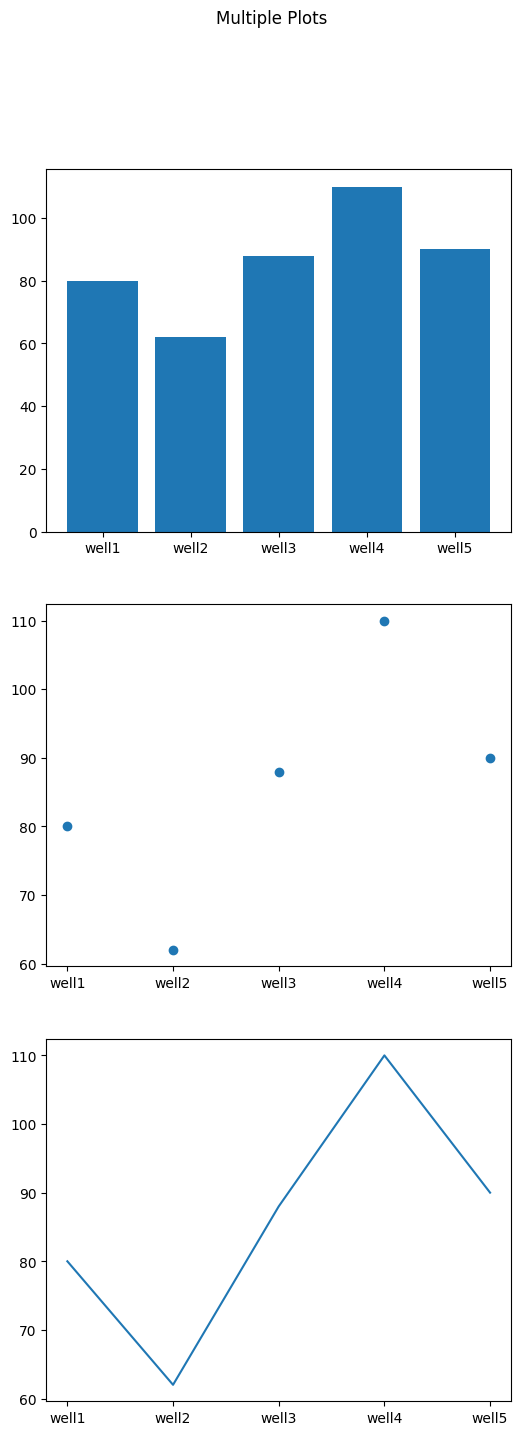

In [34]:
#PLotting vertically
plt.figure(figsize=(6, 16))
#Let us plot in 1 column and 2 rows (31x) x is for the position
plt.subplot(311)
plt.bar(wells, cells)
plt.subplot(312)
plt.scatter(wells, cells)
plt.subplot(313)
plt.plot(wells, cells)
plt.suptitle('Multiple Plots')
plt.show()

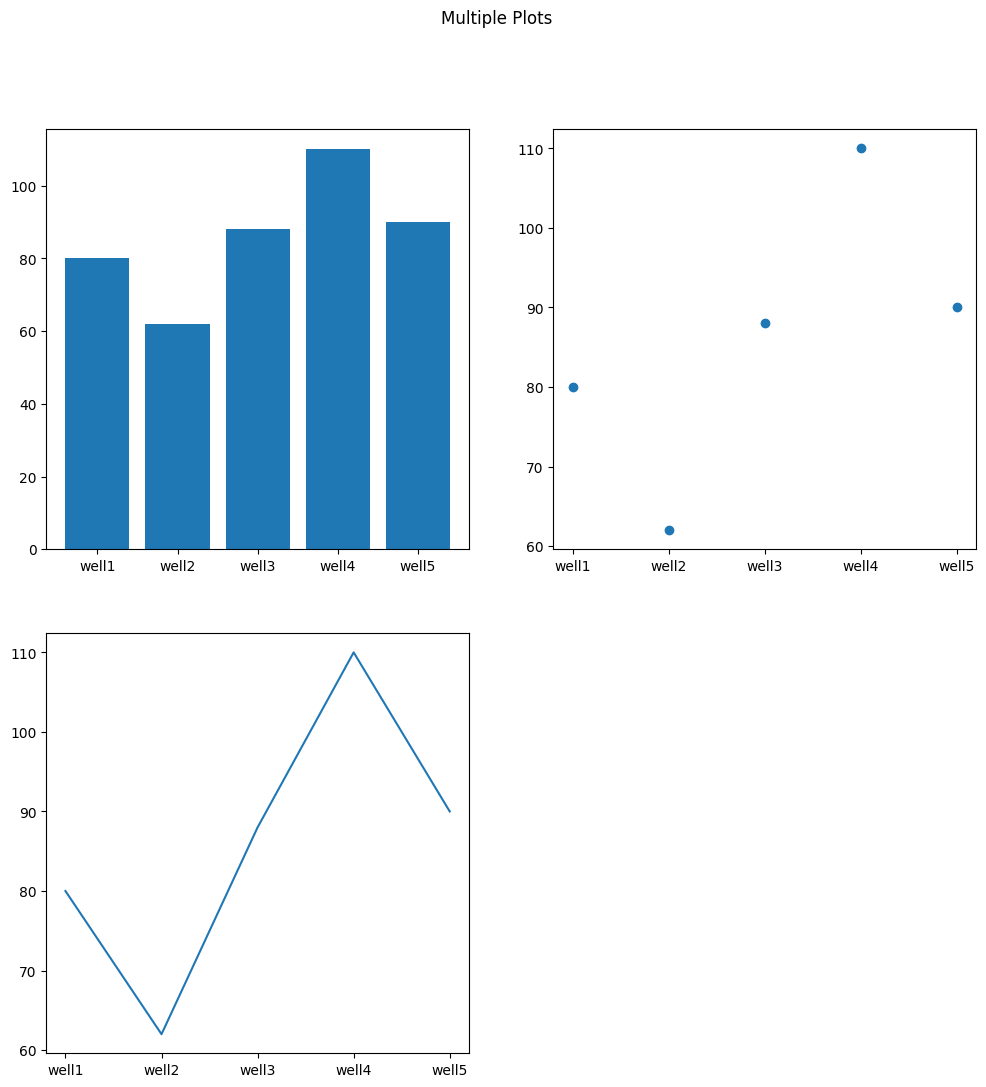

In [35]:
#Plotting as a grid
#PLotting vertically
plt.figure(figsize=(12, 12))
#Let us plot in 2 columns and 2 rows (22x) x is for the position
plt.subplot(221)
plt.bar(wells, cells)
plt.subplot(222)
plt.scatter(wells, cells)
plt.subplot(223)
plt.plot(wells, cells)
plt.suptitle('Multiple Plots')
plt.show()

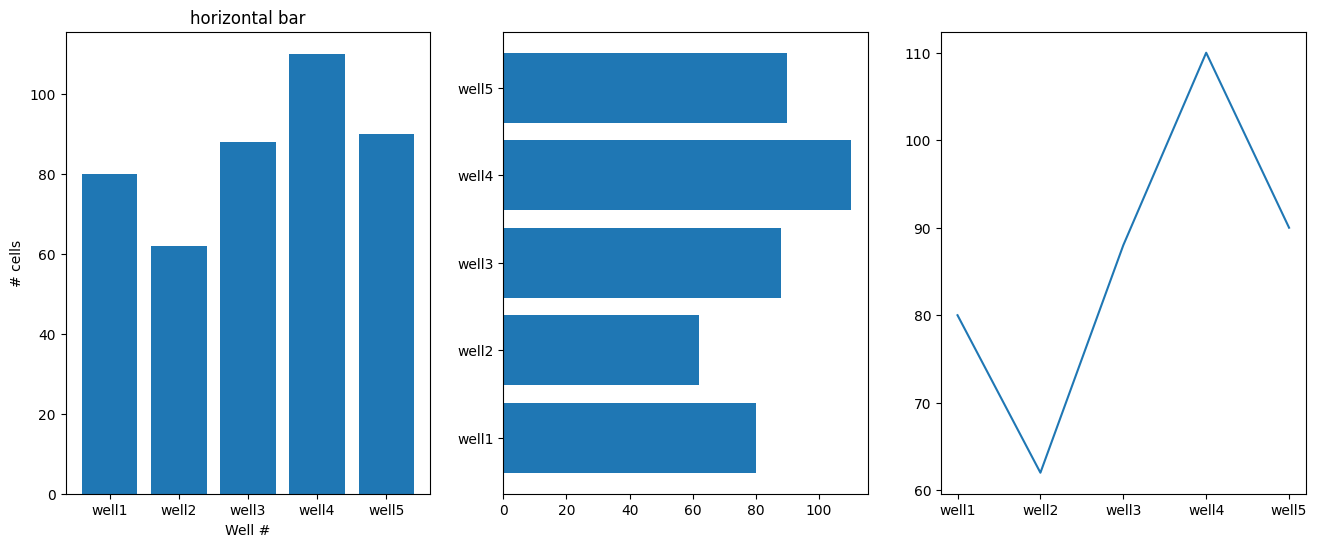

In [36]:
#Another way to define multiple plots

wells = ['well1', 'well2', 'well3', 'well4', 'well5']
cells = [80, 62, 88, 110, 90]


#Initialize the plot and sublots
# Initialize the plot
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(131)
ax1.set(title='vertical bar', xlabel='Well #', ylabel='# cells')

ax2 = fig.add_subplot(132)
ax1.set(title='horizontal bar', xlabel='Well #', ylabel='# cells')

ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar(wells, cells)
ax2.barh(wells, cells)
ax3.plot(wells, cells)

plt.savefig("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/my_plot.jpg")  #Save plot
# Show the plot
plt.show()

# 5 - Working with multiple images

## 5.1 - Usando o glob

In [37]:
"""
### Reading multiple images from a folder
#The glob module finds all the path names 
#matching a specified pattern according to the rules used by the Unix shell
#The glob.glob returns the list of files with their full path 
"""

#import the library opencv
import cv2
import glob

file_list = glob.glob('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/test_C:/JupyterLab/github_repos/NLP_project/Images/filter_images/*.*') #Rerurns a list of file names
print(file_list)  #Prints the list containing file names

[]


C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Alloy_gradient.jpg
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\BSE.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\bubbles.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\cast_iron1.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\cast_iron2.jpg
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\monalisa.jpg
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\my_plot.jpg
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Osteosarcoma_01 (1).tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Osteosarcoma_01.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Osteosarcoma_01_1sigma_blur.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Osteosarcoma_01_25Sigma_noise.tif
C:/JupyterLab/github_repos/NLP_project/Images/filter_images\Osteosarcoma_01_2sigma_blur.tif
C:/JupyterLab/github_repos/NLP_project/Image

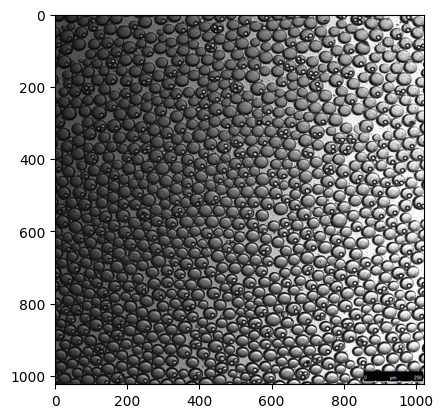

In [38]:
#Now let us load each file at a time...
my_list=[]  #Empty list to store images from the folder.
path = "C:/JupyterLab/github_repos/NLP_project/Images/filter_images/*.*"
for file in glob.glob(path):   #Iterate through each file in the list using for
    print(file)     #just stop here to see all file names printed
    a= cv2.imread(file)  #now, we can read each file since we have the full path
    my_list.append(a)  #Create a list of images (not just file names but full images)

#View images from the stored list
from matplotlib import pyplot as plt
plt.imshow(my_list[2])  #View the 3rd image in the list.

In [39]:
#Now, let us load images and perform some action.
#import the opencv library so we can use it to read and process images
import cv2
import glob

#select the path
path = "C:/JupyterLab/github_repos/NLP_project/Images/filter_images/test_C:/JupyterLab/github_repos/NLP_project/Images/filter_images/*.*"
img_number = 1  #Start an iterator for image number.
#This number can be later added to output image file names.

for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    a= cv2.imread(file)  #now, we can read each file since we have the full path
    #print(a)  #print numpy arrays for each file

In [40]:
for file in glob.glob(path):
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)  #Change color space from BGR to RGB
    cv2.imwrite("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/test_C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Color_image"+str(img_number)+".jpg", c)
    img_number +=1
    cv2.imshow('Color image', c)
    cv2.waitKey(1000)  #Display each image for 1 second
    cv2.destroyAllWindows()

## 5.2 - Usando o listdir

In [41]:
"""
os.listdir:
returns a list containing the names of the entries in the directory given by path

"""
import os

path = 'C:/JupyterLab/github_repos/NLP_project/Images/filter_images/'
print(os.listdir(path))  #Very similar to glob, prints a list of all files in the directory

for image in os.listdir(path):  #iterate through each file to perform some action
    print(image)

['Alloy_gradient.jpg', 'BSE.tif', 'bubbles.tif', 'cast_iron1.tif', 'cast_iron2.jpg', 'monalisa.jpg', 'my_plot.jpg', 'Osteosarcoma_01 (1).tif', 'Osteosarcoma_01.tif', 'Osteosarcoma_01_1sigma_blur.tif', 'Osteosarcoma_01_25Sigma_noise.tif', 'Osteosarcoma_01_2sigma_blur.tif', 'Osteosarcoma_01_8bit.ome.tiff', 'Osteosarcoma_01_8bit_salt_pepper.tif', 'Osteosarcoma_01_8bit_salt_pepper_cropped.tif', 'Osteosarcoma_01_small.tif', 'Osteosarcoma_01_transl.tif', 'Osteosarcoma_01_transl_rot.tif', 'sandstone.tif', 'sandstone_blur_2sigma.tif', 'sandstone_low_contrast.tif', 'scratch_time_series.tif', 'synthetic.jpg', 'test_images', 'Ti_powder.tif', 'Ti_powder_single.tif']
Alloy_gradient.jpg
BSE.tif
bubbles.tif
cast_iron1.tif
cast_iron2.jpg
monalisa.jpg
my_plot.jpg
Osteosarcoma_01 (1).tif
Osteosarcoma_01.tif
Osteosarcoma_01_1sigma_blur.tif
Osteosarcoma_01_25Sigma_noise.tif
Osteosarcoma_01_2sigma_blur.tif
Osteosarcoma_01_8bit.ome.tiff
Osteosarcoma_01_8bit_salt_pepper.tif
Osteosarcoma_01_8bit_salt_pepper_c

In [42]:
"""
#os.walk --     
returns a generator, that creates a tuple of values 
(current_path, directories in current_path, files in current_path).   

Every time the generator is called it will follow each directory recursively 
until no further sub-directories are available from the initial directory 
that walk was called upon.

os.path.join() method in Python join one or more path components intelligently.
"""
import os
print(os.walk("."))  #Nothing to see here as this is just a generator object

# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk("."):
    print(root)  #Prints root directory names

    path = root.split(os.sep)  #SPlit at separator (/ or \)
    print(path)  #Gives names of directories for easy location of files
    print(files)   #Prints all file names in all directories

<generator object _walk at 0x00000209289DF120>
.
['.']
['filter_image_example.ipynb', 'saved_using_opencv.jpg', 'saved_using_opencv2.jpg', 'saved_using_opencv3.jpg', 'saved_using_pyplot.jpg', 'saved_using_skimage.tif', 'saved_using_tifffile.tiff']


In [43]:
#Let us now visualize directories and files within them
for root, dirs, files in os.walk("."):
    print((len(path) - 1) * '---', os.path.basename(root)) #Add --- based on the path
    for file in files:
        print(len(path) * '---', file)

 .
--- filter_image_example.ipynb
--- saved_using_opencv.jpg
--- saved_using_opencv2.jpg
--- saved_using_opencv3.jpg
--- saved_using_pyplot.jpg
--- saved_using_skimage.tif
--- saved_using_tifffile.tiff


# 6 - Fazendo transformações em imagens

## 6.1 - Usando o scikit-image

In [44]:
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean

img = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", as_gray=True)
print(img.shape)
#Rescale, resize image by a given factor. While rescaling image
#gaussian smoothing can performed to avoid anti aliasing artifacts.
img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)  #Check rescales image size in variable explorer
print(img_rescaled.shape)

(1104, 1376)
(276, 344)


In [45]:
#Resize, resize image to given dimensions (shape)
img_resized = resize(img, (200, 200),               #Check dimensions in variable explorer
                       anti_aliasing=True)
print(img_resized.shape)

(200, 200)


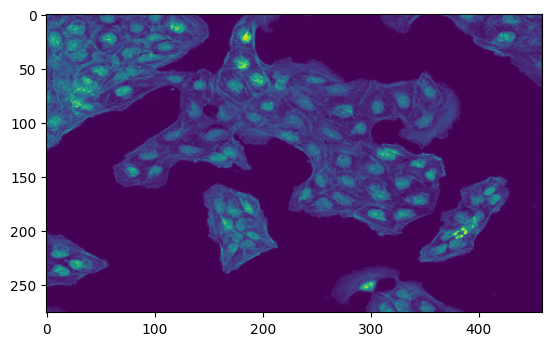

In [46]:
#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(img, (4, 3))
plt.imshow(img_downscaled)

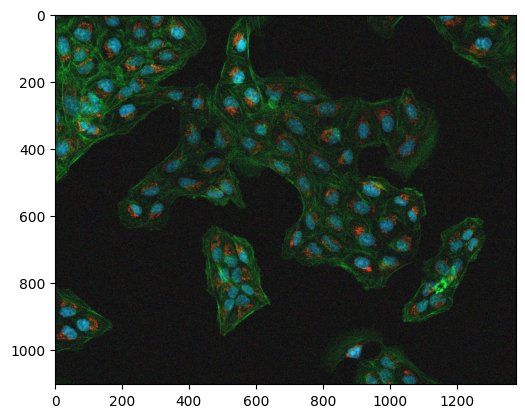

In [47]:
#A quick look at a few skimage functions
from skimage import io
from skimage.filters import gaussian, sobel
img = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif")
plt.imshow(img)

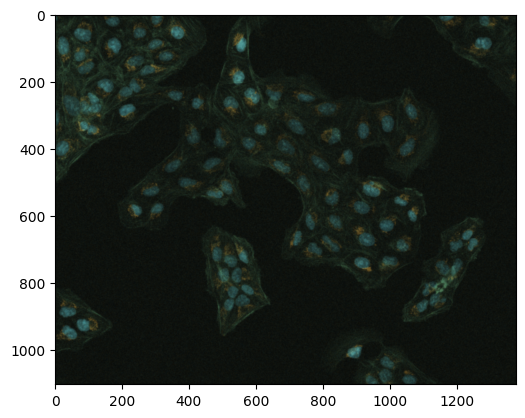

In [48]:
gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
plt.imshow(gaussian_using_skimage)

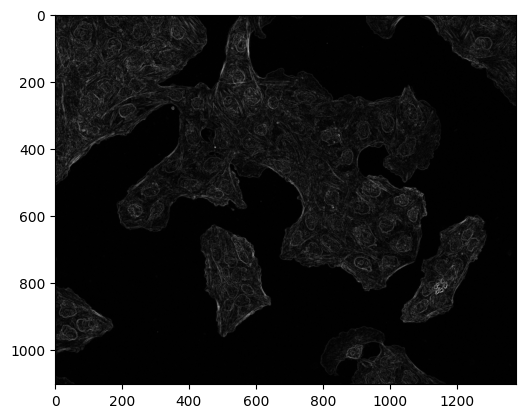

In [49]:
img_gray = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", as_gray=True)
sobel_img = sobel(img_gray)  #Works only on 2D (gray) images
plt.imshow(sobel_img, cmap='gray')

## 6.2 - Usando openCV

In [50]:
import cv2
img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/monalisa.jpg", 1)   #Color is BGR not RGB

#use cv2.resize. Can specify size or scaling factor.
#Inter_cubic or Inter_linear for zooming.
#Use INTER_AREA for shrinking
#Following xample zooms by 2 times.

resized = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

cv2.imshow("original pic", img)
cv2.waitKey(0)
cv2.imshow("resized pic", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
grey_img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/monalisa.jpg", 0)
img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/monalisa.jpg", 1)   #Color is BGR not RGB

print(img.shape)     
print("Top left", img[0,0])    #Top left pixel
print("Top right", img[0, 255])  # Top right
print("Bottom Left", img[255, 0]) # Bottom left
print("Bottom right", img[255, 255])  # Bottom right

(256, 256, 3)
Top left [ 73 124 116]
Top right [74 98 90]
Bottom Left [ 66  82 111]
Bottom right [87 79 90]


In [52]:
cv2.imshow("color pic", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
#Split and merging channels
#Show individual color channels in the image
blue = img[:, :, 0]   #Show only blue pic. (BGR so B=0)
green = img[:, :, 1]  #Show only green pixels
red = img[:, :, 2]  #red only

In [54]:
cv2.imshow("red pic", red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
#Or split all channels at once

b,g,r = cv2.split(img)

cv2.imshow("green pic", g)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [56]:
#to merge each image into bgr

img_merged = cv2.merge((b,g,r))

cv2.imshow("merged pic", img_merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
# Opencv offers Many libraries for image processing tasks
#We cover a few of them in future but for now let us look at a simple example
#Edge detection:

import cv2

img = cv2.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01.tif", 0)
edges = cv2.Canny(img,100,200)   #Image, min and max values

cv2.imshow("Original Image", img)
cv2.waitKey(0)
cv2.imshow("Canny", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 7 - Usando o unsharp

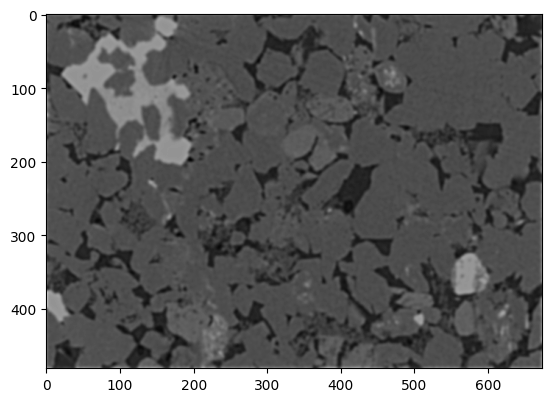

In [58]:
#This code shows that unsharp is nothing but original + amount *(original-blurred)
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

img = img_as_float(io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/sandstone_blur_2sigma.tif", as_gray=True))

gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0)

img2 = (img - gaussian_img)*2.

img3 = img + img2

from matplotlib import pyplot as plt
plt.imshow(img3, cmap="gray")

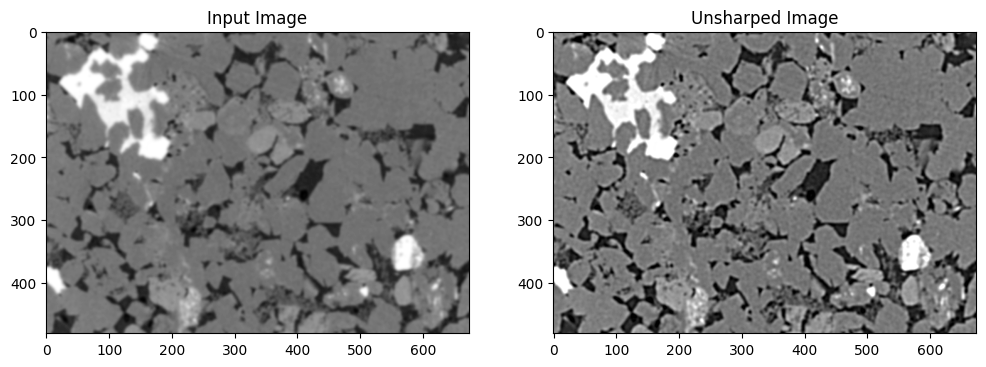

In [59]:
from skimage import io
from skimage.filters import unsharp_mask

img = io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/sandstone_blur_2sigma.tif")

#Radius defines the degree of blurring
#Amount defines the multiplication factor for original - blurred image
unsharped_img = unsharp_mask(img, radius=3, amount=2)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

# 8 - Denoising

## 8.1 - Usando filtro Gaussiano

In [60]:
"""

cv2.filter2D - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d
cv2.GaussianBlur - https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/
skimage.filters.gaussian - https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian
"""
import cv2
from skimage import io, img_as_float
from skimage.filters import gaussian

img_gaussian_noise = img_as_float(io.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_8bit_salt_pepper.tif', as_gray=True))

img = img_gaussian_noise

gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
#sigma defines the std dev of the gaussian kernel. SLightly different than 
#how we define in cv2


cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Using cv2 gaussian", gaussian_using_cv2)
cv2.waitKey(0)
cv2.imshow("Using skimage", gaussian_using_skimage)
cv2.waitKey(0)

cv2.destroyAllWindows()


## 8.2 - Usando filtro Median blur

In [61]:
"""
Spyder Editor

cv2.medianBlur - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
skimage.filters.median - https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

See how median is much better at cleaning salt and pepper noise compared to Gaussian
"""
import cv2
from skimage.filters import median


#Needs 8 bit, not float.
img_gaussian_noise = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif', 0)
img_salt_pepper_noise = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_8bit_salt_pepper.tif', 0)

img = img_salt_pepper_noise


median_using_cv2 = cv2.medianBlur(img, 3)

from skimage.morphology import disk
#Disk creates a circular structuring element, similar to a mask with specific radius
median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)


cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("cv2 median", median_using_cv2)
cv2.waitKey(0)
cv2.imshow("Using skimage median", median_using_skimage)
cv2.waitKey(0)

cv2.destroyAllWindows()


## 8.3 - Usando filtro bilateral

In [62]:
"""
Spyder Editor

cv2.cv2.bilateralFilter - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
skimage bilateral - https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html

https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf

Bilateral is slow and not very efficient at salt and pepper
"""
import cv2

img_gaussian_noise = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif', 0)
img_salt_pepper_noise = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_8bit_salt_pepper.tif', 0)

img = img_gaussian_noise

bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

#d - diameter of each pixel neighborhood used during filtering
#sigmaColor - Sigma of grey/color space. 
#sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)

In [63]:
from skimage.restoration import denoise_bilateral
bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15,
                channel_axis=None)

#mutichannel is deprecatedm use channel_axis (https://github.com/scikit-image/scikit-image/issues/4294)
#'multichannel = False' does the same as 'channel_axis = None' (https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_bilateral)
#sigma_color = float - Sigma for grey or color value. 
#For large sigma_color values the filter becomes closer to gaussian blur.
#sigma_spatial: float. Standard ev. for range distance. Increasing this smooths larger features.

cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("cv2 bilateral", bilateral_using_cv2)
cv2.waitKey(0)
cv2.imshow("Using skimage bilateral", bilateral_using_skimage)
cv2.waitKey(0)

cv2.destroyAllWindows()

## 8.4 - Usando filtro Non-local Means do scikit-image

In [64]:
"""

https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html

Works well for random gaussian noise but not as good for salt and pepper
https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/Buades-NonLocal.pdf

The non-local means algorithm replaces the value of a pixel by an average 
of a selection of other pixels values: small patches centered on the other 
pixels are compared to the patch centered on the pixel of interest, and the 
average is performed only for pixels that have patches close to the current patch. 
"""
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

img_gaussian_noise = img_as_float(io.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_8bit_salt_pepper.tif', as_gray=True))

img = img_gaussian_noise

sigma_est = np.mean(estimate_sigma(img, channel_axis=None))
#sigma_est = 0.1

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, channel_axis=None)

"""
When the fast_mode argument is False, a spatial Gaussian weighting is applied 
to the patches when computing patch distances. When fast_mode is True a 
faster algorithm employing uniform spatial weighting on the patches is applied.

Larger h allows more smoothing between disimilar patches.

"""

#denoise_img_as_8byte = img_as_ubyte(denoise_img)

cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("NLM Filtered", denoise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8.5 - Usando variância total

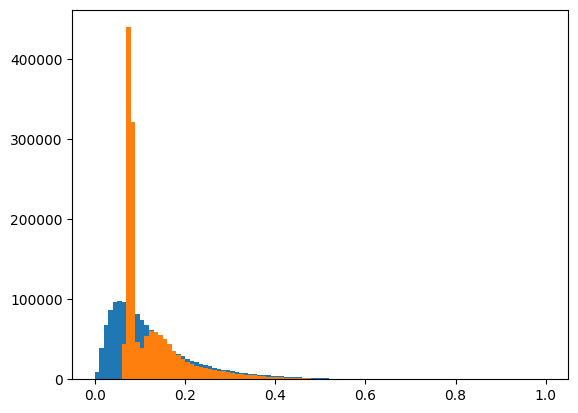

In [65]:
"""

Works well for random gaussian noise but not as good for salt and pepper

https://hal.archives-ouvertes.fr/hal-00437581/document
"""
import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

img = img_as_float(io.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif', as_gray=True))


plt.hist(img.flat, bins=100, range=(0,1))  #.flat returns the flattened numpy array (1D)


denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, max_num_iter=200, channel_axis=None)

"""
denoise_tv_chambolle(image, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
weight: The greater weight, the more denoising (at the expense of fidelity to input).
eps: Relative difference of the value of the cost function that determines the stop criterion. 
n_iter_max: Max number of iterations used for optimization

"""


plt.hist(denoise_img.flat, bins=100, range=(0,1))  #.flat returns the flattened numpy array (1D)


cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("TV Filtered", denoise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8.6 - Denoise com Block Matching & 3D filtering (BM3D)

In [66]:
"""

http://www.cs.tut.fi/~foi/papers/ICIP2019_Ymir.pdf

"""
#!pip install bm3d
from skimage import io, img_as_float
import bm3d
import cv2

noisy_img = img_as_float(io.imread("C:/JupyterLab/github_repos/NLP_project/Images/filter_images/Osteosarcoma_01_25Sigma_noise.tif", as_gray=True))

BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

"""
bm3d library is not well documented yet, but looking into source code....
sigma_psd - noise standard deviation
stage_arg: Determines whether to perform hard-thresholding or Wiener filtering.
stage_arg = BM3DStages.HARD_THRESHOLDING or BM3DStages.ALL_STAGES (slow but powerful)
All stages performs both hard thresholding and Wiener filtering. 
"""

cv2.imshow("Original", noisy_img)
cv2.imshow("Denoised", BM3D_denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 9 - Detecção de contornos

## 9.1 - Diferentes filtros do scikit-image

"""

Roberts
The idea behind the Roberts cross operator is to approximate the gradient of an
image through discrete differentiation which is achieved by computing the sum of the squares of the
differences between diagonally adjacent pixels. It highlights regions of high spatial gradient which often
correspond to edges.

Sobel:
Similar to Roberts - calculates gradient of the image. 
The operator uses two 3×3 kernels which are convolved with the original image to calculate
approximations of the derivatives – one for horizontal changes, and one for vertical.

Scharr:
Typically used to identify gradients along the x-axis (dx = 1, dy = 0) and y-axis (dx = 0,
dy = 1) independently. Performance is quite similar to Sobel filter.

Prewitt:
The Prewitt operator is based on convolving
the image with a small, separable, and integer valued filter in horizontal and vertical directions and is
therefore relatively inexpensive in terms of computations like Sobel operator.

Farid:
Farid and Simoncelli propose to use a pair of kernels, one for interpolation and another for
differentiation (csimilar to Sobel). These kernels, of fixed sizes 5 x 5 and 7 x 7, are optimized so
that the Fourier transform approximates their correct derivative relationship. 

                                         
"""

In [67]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np

In [68]:
img = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/sandstone.tif', 0)

In [69]:
#Edge detection
from skimage.filters import roberts, sobel, scharr, prewitt, farid

In [70]:
roberts_img = roberts(img)
sobel_img = sobel(img)
scharr_img = scharr(img)
prewitt_img = prewitt(img)
farid_img = farid(img)

In [71]:
cv2.imshow("Original", img)
cv2.imshow("Roberts", roberts_img)
cv2.imshow("Sobel", sobel_img)
cv2.imshow("Scharr", scharr_img)
cv2.imshow("Prewitt", prewitt_img)
cv2.imshow("Farid", farid_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 9.2 - Usando o Canny

In [72]:
"""
Canny:
The Process of Canny edge detection algorithm can be broken down to 5 different steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.

https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html
"""

from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np

img = cv2.imread('C:/JupyterLab/github_repos/NLP_project/Images/filter_images/sandstone.tif', 0)

#Canny
canny_edge = cv2.Canny(img, 50, 80)  #Supply Thresholds 1 and 2 

#Autocanny
sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median)) 
#Lower threshold is sigma % lower than median
#If the value is below 0 then take 0 as the value

upper = int(min(255, (1.0 + sigma) * median)) 
#Upper threshold is sigma% higher than median
#If the value is larger than 255 then take 255 a the value

auto_canny = cv2.Canny(img, lower, upper)

cv2.imshow("Original", img)
cv2.imshow("Canny", canny_edge)
cv2.imshow("Auto Canny", auto_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()